# Introduction to pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[`Pandas`](https://pandas.pydata.org/docs/index.html) is a powerful and widely-used open-source Python library designed for data manipulation and analysis. At the heart of pandas are two primary data structures: **series** and **data frames**. These data structures serve as the foundational building blocks for everything that is nice about `pandas`.

- [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series):  a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.
- [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame): a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.



## Creating Series and DataFrame Objects

Let's start by manually creating a simple series object:

In [2]:
s = pd.Series([1, 3, 5, 7])
s

0    1
1    3
2    5
3    7
dtype: int64

To manually create a DataFrame, we can do so from a dictionary like follows:

In [3]:
df = pd.DataFrame({
    "first_name": ["Knute", "Frank", "Ara", "Dan", "Lou", "Marcus"],
    "last_name": ["Rockne", "Leahy", "Parseghian", "Devine", "Holtz", "Freeman"],
    "win_percent": [0.881, 0.855, 0.836, 0.764, 0.765, 0.786]
})
df

,first_name,last_name,win_percent
0,Knute,Rockne,0.881
1,Frank,Leahy,0.855
2,Ara,Parseghian,0.836
3,Dan,Devine,0.764
4,Lou,Holtz,0.765
5,Marcus,Freeman,0.786


It is also possible to create a DataFrame from a numpy array:

In [4]:
pd.DataFrame(np.random.randn(6, 4), columns=list("ABCD"))

,A,B,C,D
0,-1.070594,0.376570,0.274615,0.019533
1,0.587511,-1.209149,-0.841527,0.689402
2,-0.067650,-0.510960,0.734652,-0.284406
3,-1.040383,-0.513105,1.122596,-1.197059
4,0.631201,-1.544154,-1.124264,-0.030905
5,-0.804015,0.286021,1.255864,0.901653


## Exploring DataFrames

The data above are quite small in comparison to datasets that we might see in practice. For larger datasets, it is crucial to be able to obtain a quick overview or glimpse of the overall data structure. 

- `.info()`: provides a concise summary of the DataFrame
- `.describe()`: provides a quick statistical summary of numeric columns in the DataFrame
- `.head()`: prints the top five rows of the DataFrame
- `.tail()`: prints the bottom five rows of the DataFrame
- `.shape`: outputs the dimensions of the DataFrame (# rows, # columns)
- `.dtypes`: lists the data type of each column in the DataFrame
- `.columns`: lists the column names in the DataFrame
- `.index`: lists the indexes or row names in the DataFrame

In [5]:
df.info()  # general info/summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   first_name   6 non-null      object 
 1   last_name    6 non-null      object 
 2   win_percent  6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 276.0+ bytes


In [6]:
df.describe()  # statistical summary of numeric columns

,win_percent
count,6.000000
mean,0.814500
std,0.049674
min,0.764000
25%,0.770250
50%,0.811000
75%,0.850250
max,0.881000


In [7]:
df.head()  # first five rows

,first_name,last_name,win_percent
0,Knute,Rockne,0.881
1,Frank,Leahy,0.855
2,Ara,Parseghian,0.836
3,Dan,Devine,0.764
4,Lou,Holtz,0.765


In [8]:
df.tail()  # bottom five rows

,first_name,last_name,win_percent
1,Frank,Leahy,0.855
2,Ara,Parseghian,0.836
3,Dan,Devine,0.764
4,Lou,Holtz,0.765
5,Marcus,Freeman,0.786


In [9]:
df.shape  # dimensions

(6, 3)

In [10]:
df.dtypes  # data types of each column

first_name      object
last_name       object
win_percent    float64
dtype: object

In [11]:
df.columns  # column names

Index(['first_name', 'last_name', 'win_percent'], dtype='object')

In [12]:
df.index  # row names

RangeIndex(start=0, stop=6, step=1)

**Exercise 1.** Print the number of rows in `df`.

In [13]:
df.shape[0]

6

## Selection

Once we have a DataFrame object, there are many ways to select/filter columns and rows. In this section, we will review the different ways to perform this selection.

### Get Item (`[]`)

If we pass a single label to a DataFrame using `[]`, this selects a column in the DataFrame and yields a Series object.

In [14]:
df["first_name"]

0     Knute
1     Frank
2       Ara
3       Dan
4       Lou
5    Marcus
Name: first_name, dtype: object

This is equivalent to:

In [15]:
df.first_name

0     Knute
1     Frank
2       Ara
3       Dan
4       Lou
5    Marcus
Name: first_name, dtype: object

If we want to select multiple columns in the DataFrame, we can instead pass a list of column names such as:

In [16]:
df[["first_name", "last_name"]]

,first_name,last_name
0,Knute,Rockne
1,Frank,Leahy
2,Ara,Parseghian
3,Dan,Devine
4,Lou,Holtz
5,Marcus,Freeman


On the other hand, passing a slice using `:` selects matching rows:



In [17]:
df[0:3]

,first_name,last_name,win_percent
0,Knute,Rockne,0.881
1,Frank,Leahy,0.855
2,Ara,Parseghian,0.836


**Exercise 2.** Subset the DataFrame `df` to get the last 4 rows. Then, print out the dimensions of this resulting DataFrame.

In [18]:
# get last four rows of df
df[(df.shape[0]-4):]

,first_name,last_name,win_percent
2,Ara,Parseghian,0.836
3,Dan,Devine,0.764
4,Lou,Holtz,0.765
5,Marcus,Freeman,0.786


In [19]:
# print out the dimensions
df[(df.shape[0]-4):].shape

(4, 3)

### Selection by Label vs Position

As an alternative to using `[]`, there are two methods `.loc()` and `.iloc()` that provide a more flexible alternative for subsetting a DataFrame by label (`.loc()`) or by position (`.iloc()`). In particular, `.loc()` and `.iloc()` allow us to subset both rows and columns in a DataFrame in a single call.

For example, suppose we want to extract the first two columns (i.e., the `first_name` and `last_name`) from `df`. The following two code chunks are equivalent approaches to achieve this. Note the `:` in the first component of `[]` means to select all rows.

In [20]:
df.loc[:, ["first_name", "last_name"]]

,first_name,last_name
0,Knute,Rockne
1,Frank,Leahy
2,Ara,Parseghian
3,Dan,Devine
4,Lou,Holtz
5,Marcus,Freeman


In [21]:
# this would return an IndexError if uncommented
# df.iloc[:, ["first_name", "last_name"]]
df.iloc[:, 0:2]

,first_name,last_name
0,Knute,Rockne
1,Frank,Leahy
2,Ara,Parseghian
3,Dan,Devine
4,Lou,Holtz
5,Marcus,Freeman


**Exercise 3.** As seen above, `df.iloc[:, 0:2]` returns the first two columns of `df`. If you try to run `df.loc[:, 0:2]` instead, this will return an Index Error. However, both `df.iloc[0:2, :]` and `df.loc[0:2, :]` run without error (you can try this out for yourself). Do these two commands (i.e., `df.iloc[0:2, :]` and `df.loc[0:2, :]`) give the same results? Can you explain this phenomenon?

In [22]:
df.loc[0:2, :]

,first_name,last_name,win_percent
0,Knute,Rockne,0.881
1,Frank,Leahy,0.855
2,Ara,Parseghian,0.836


In [23]:
df.iloc[0:2, :]

,first_name,last_name,win_percent
0,Knute,Rockne,0.881
1,Frank,Leahy,0.855


Answer: Since `.loc()` is selecting/indexing by label, then it is return all rows with indexes that match `0:2` (i.e., row 0, row 1, and row 2). On the other hand, `.iloc()` is selecting/indexing by position (rows 0 through 2, but not including 2 because of the way python indexing works).

**Exercise 4.** Try running `df.loc[:, ["first_name"]]` amd `df.loc[:, "first_name"]`. Do they give the same result?

In [24]:
df.loc[:, ["first_name"]]

,first_name
0,Knute
1,Frank
2,Ara
3,Dan
4,Lou
5,Marcus


In [25]:
df.loc[:, "first_name"]

0     Knute
1     Frank
2       Ara
3       Dan
4       Lou
5    Marcus
Name: first_name, dtype: object

Answer: No, they do not give the same result. The former returns a DataFrame object while the latter returns a Series object.

As alluded to previously, it is possible to select both a subset of rows and columns using either `.iloc()` or `loc()`.

For example, the code below selects the rows labeled 0, 2, and 5 and columns "first_name" and "win_percent".

In [26]:
df.loc[[0, 2, 5], ["first_name", "win_percent"]]

,first_name,win_percent
0,Knute,0.881
2,Ara,0.836
5,Marcus,0.786


Since the indexes match the row positions, we could have equivalently subsetted the DataFrame using `.iloc()` as follows:

In [27]:
df.iloc[[0, 2, 5], [0, 2]]

,first_name,win_percent
0,Knute,0.881
2,Ara,0.836
5,Marcus,0.786


**Exercise 5.** Extract the first 3 rows of the columns named `"col1"` and `"col50"` in `df2` below.

In [28]:
col_names = np.random.choice(["col" + str(i) for i in range(100)], 100, replace=False)
row_names = np.random.choice(["row" + str(i) for i in range(100)], 100, replace=False)
df2 = pd.DataFrame(np.random.randn(100, 100), columns=col_names, index=row_names)
df2

,col36,col3,col61,col2,col59,col90,col9,col82,col54,col97,...,col20,col51,col43,col56,col32,col40,col10,col23,col89,col65
row17,0.584318,-0.219791,1.485059,-0.827602,0.894362,-1.660643,0.165909,0.450284,1.510259,1.101514,...,1.046540,0.000864,-0.417787,-0.029252,0.308071,-1.247307,-0.029459,-0.329847,2.468405,-0.323730
row99,1.164971,1.039113,-1.032399,0.256415,0.390484,0.058015,-0.605807,-0.888435,-0.345702,0.747063,...,-0.180298,-1.275194,1.233701,0.734840,1.404143,0.217802,0.186414,-0.535995,1.024044,-0.363374
row3,0.601511,-1.368739,-2.031997,1.140358,1.385523,1.140277,0.483886,-0.903175,0.140057,0.542738,...,1.144106,-0.523354,0.151187,2.131118,-2.160769,1.323550,-1.386804,-0.231472,-0.722318,2.500955
row52,0.740266,0.073417,0.713261,0.982280,1.370222,-1.146971,0.389453,0.178059,-1.921903,-0.588527,...,-1.279635,-0.771207,0.114402,-0.190249,1.892584,0.657008,-0.330954,0.874144,0.236365,0.258217
row89,-0.036420,-1.587461,0.041373,0.922737,-0.299385,-0.247627,-0.836477,0.394478,0.693818,2.524129,...,0.613622,-0.199606,-0.568440,-0.862043,0.197066,-1.076879,-0.702433,-0.212521,-0.864773,-0.477881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
row75,-1.121960,0.005236,-0.011845,-0.265218,-0.141280,-0.384589,0.139483,0.329474,0.319615,-0.954480,...,1.861119,0.072179,-0.397451,-0.057183,0.597972,-0.433469,-0.706084,-0.473021,0.025516,1.818586
row49,-0.624777,1.362186,-1.197076,-0.746901,-1.148833,1.135315,1.033452,-0.002069,0.162849,-1.056395,...,0.621666,0.252784,0.573227,-0.744504,-0.520527,0.558231,1.623286,-1.990039,1.701951,0.912360
row54,0.165238,-0.250954,1.245841,-2.135712,-0.398022,-0.101758,-0.509595,-2.395979,1.101139,-0.757403,...,0.610066,-0.931216,-1.560403,2.089829,0.300496,-0.723008,-0.102496,0.080746,1.167159,0.307130
row69,1.169044,0.289731,0.031618,0.455689,0.695489,1.283627,0.324346,0.006919,-0.140314,-0.346853,...,0.065154,-0.803844,0.319083,-0.800348,-1.728861,-0.086756,-1.136081,0.271421,-1.332199,2.435175


In [29]:
df2.iloc[0:3].loc[:, ["col1", "col50"]]

,col1,col50
row17,0.138165,-0.432010
row99,-1.541859,-0.669293
row3,-0.163259,-1.319632


### Boolean Indexing

It is also possible to select or filter rows/columns using boolean indexes. For example, if we want to select all coaches with a winning percentage greater than 0.8, we can do:

In [30]:
df[df["win_percent"] > 0.8]

,first_name,last_name,win_percent
0,Knute,Rockne,0.881
1,Frank,Leahy,0.855
2,Ara,Parseghian,0.836


Or if we want to get the coaches who's first name is either `"Marcus"` or `"Lou"`,

In [31]:
df[df["first_name"].isin(["Knute", "Lou"])]

,first_name,last_name,win_percent
0,Knute,Rockne,0.881
4,Lou,Holtz,0.765


Or if we want to get the coaches who's last name contains an `"n"`

In [32]:
df[df["last_name"].str.contains("n", case=False)]

,first_name,last_name,win_percent
0,Knute,Rockne,0.881
2,Ara,Parseghian,0.836
3,Dan,Devine,0.764
5,Marcus,Freeman,0.786


Or if we want to get the coaches who's last name contains an `"n"` and has a winning percentage greater than 0.8

In [33]:
df[df["last_name"].str.contains("n") & (df["win_percent"] > 0.8)]

,first_name,last_name,win_percent
0,Knute,Rockne,0.881
2,Ara,Parseghian,0.836


**Exercise 6.** Extract the subset of rows from `df` corresponding to the coaches who's last name contains an `"n"` or has a winning percentage greater than 0.8.

In [34]:
df[df["last_name"].str.contains("n") | (df["win_percent"] > 0.8)]

,first_name,last_name,win_percent
0,Knute,Rockne,0.881
1,Frank,Leahy,0.855
2,Ara,Parseghian,0.836
3,Dan,Devine,0.764
5,Marcus,Freeman,0.786


### Setting/Removing

To set a new column in the DataFrame, you can use the following syntax:

In [35]:
df["n_championships"] = ["3", "4", "2", "1", "1", "1?"]
df

,first_name,last_name,win_percent,n_championships
0,Knute,Rockne,0.881,3
1,Frank,Leahy,0.855,4
2,Ara,Parseghian,0.836,2
3,Dan,Devine,0.764,1
4,Lou,Holtz,0.765,1
5,Marcus,Freeman,0.786,1?


It is also possible to create a new column using a Series object:

In [36]:
df["n_championships"] = pd.Series(["3", "4", "2", "1", "1", "1?"])

However, it is important to note that setting a new column automatically aligns the data by the indexes. In the extreme case, when the indexes do not match like below, the resulting new column will be all NAs.

In [37]:
champs = pd.Series(
    ["3", "4", "2", "1", "1", "1?"], 
    index=["Knute", "Frank", "Ara", "Dan", "Lou", "Marcus"]
)
df["n_championships"] = champs
df

,first_name,last_name,win_percent,n_championships
0,Knute,Rockne,0.881,NaN
1,Frank,Leahy,0.855,NaN
2,Ara,Parseghian,0.836,NaN
3,Dan,Devine,0.764,NaN
4,Lou,Holtz,0.765,NaN
5,Marcus,Freeman,0.786,NaN


**Exercise 7.** Fix the above code chunk so that the number of championships for each coach is correct.

In [38]:
champs = pd.Series(
    ["3", "4", "2", "1", "1", "1?"], 
    index=range(df.shape[0])
)
df["n_championships"] = champs
df

,first_name,last_name,win_percent,n_championships
0,Knute,Rockne,0.881,3
1,Frank,Leahy,0.855,4
2,Ara,Parseghian,0.836,2
3,Dan,Devine,0.764,1
4,Lou,Holtz,0.765,1
5,Marcus,Freeman,0.786,1?


To change a particular entry in the DataFrame, we can combine methods for selection discussed previously and `=`, e.g., 

In [39]:
df.loc[df["first_name"] == "Dan", "first_name"] = "Daniel"
df

,first_name,last_name,win_percent,n_championships
0,Knute,Rockne,0.881,3
1,Frank,Leahy,0.855,4
2,Ara,Parseghian,0.836,2
3,Daniel,Devine,0.764,1
4,Lou,Holtz,0.765,1
5,Marcus,Freeman,0.786,1?


**Exercise 8.** Change the number of championships won by Marcus Freeman to `"1"`. Then change the `"n_championships"` column from a string to an integer.

In [40]:
df.loc[df["first_name"] == "Marcus", "n_championships"] = "1"
df["n_championships"] = df["n_championships"].astype(int)
df

,first_name,last_name,win_percent,n_championships
0,Knute,Rockne,0.881,3
1,Frank,Leahy,0.855,4
2,Ara,Parseghian,0.836,2
3,Daniel,Devine,0.764,1
4,Lou,Holtz,0.765,1
5,Marcus,Freeman,0.786,1


In [41]:
df.dtypes

first_name          object
last_name           object
win_percent        float64
n_championships      int64
dtype: object

To remove a column, use the drop method:

In [42]:
df.drop("n_championships", axis=1)

,first_name,last_name,win_percent
0,Knute,Rockne,0.881
1,Frank,Leahy,0.855
2,Ara,Parseghian,0.836
3,Daniel,Devine,0.764
4,Lou,Holtz,0.765
5,Marcus,Freeman,0.786


**Exercise 9.** Remove both the `"win_percent"` and the `"n_championships"` columns from `df`.

In [43]:
df.drop(["n_championships", "win_percent"], axis=1)

,first_name,last_name
0,Knute,Rockne
1,Frank,Leahy
2,Ara,Parseghian
3,Daniel,Devine
4,Lou,Holtz
5,Marcus,Freeman


## Rename

To rename columns, DataFrames have a `.rename()` method:

In [44]:
df.rename(columns={"first_name": "first", "last_name": "last"}, inplace=True)
df

,first,last,win_percent,n_championships
0,Knute,Rockne,0.881,3
1,Frank,Leahy,0.855,4
2,Ara,Parseghian,0.836,2
3,Daniel,Devine,0.764,1
4,Lou,Holtz,0.765,1
5,Marcus,Freeman,0.786,1


**Exercise 10.** Notice that dropping the columns earlier does not remove the columns in place (i.e., you must set `df = df.drop(...)` in order to store the result with the specified columns removed). Does renaming using `df.rename()` rename the columns in place?

In [45]:
df

,first,last,win_percent,n_championships
0,Knute,Rockne,0.881,3
1,Frank,Leahy,0.855,4
2,Ara,Parseghian,0.836,2
3,Daniel,Devine,0.764,1
4,Lou,Holtz,0.765,1
5,Marcus,Freeman,0.786,1


Answer: yes, the original DataFrame is modified in place.

## Sorting

To sort rows/columns, we can sort either by the DataFrame's index/column names or by values in particular column(s).

In [46]:
# sorting columns by column name
df.sort_index(axis=1, ascending=True)

,first,last,n_championships,win_percent
0,Knute,Rockne,3,0.881
1,Frank,Leahy,4,0.855
2,Ara,Parseghian,2,0.836
3,Daniel,Devine,1,0.764
4,Lou,Holtz,1,0.765
5,Marcus,Freeman,1,0.786


In [47]:
# sort first by winning percentage
df.sort_values(by=["win_percent"], ascending=False)

,first,last,win_percent,n_championships
0,Knute,Rockne,0.881,3
1,Frank,Leahy,0.855,4
2,Ara,Parseghian,0.836,2
5,Marcus,Freeman,0.786,1
4,Lou,Holtz,0.765,1
3,Daniel,Devine,0.764,1


**Exercise 11.** Sort the coaches first by number of championships and then by winning percentage to break any ties in the number of championships.

In [48]:
# sort first by number of championships and then by win percentage
df.sort_values(by=["n_championships", "win_percent"], ascending=False)

,first,last,win_percent,n_championships
1,Frank,Leahy,0.855,4
0,Knute,Rockne,0.881,3
2,Ara,Parseghian,0.836,2
5,Marcus,Freeman,0.786,1
4,Lou,Holtz,0.765,1
3,Daniel,Devine,0.764,1


## Grouping and Aggregation

In `pandas`, we can "group" DataFrames by particular column(s), so that subsequent operations are applied to each group independently. What does this mean? This is best illustrated with an example.


In [49]:
df = pd.DataFrame({
    "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
    "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
    "C": np.random.randn(8),
    "D": np.random.randn(8),
})
df

,A,B,C,D
0,foo,one,0.011716,-0.398702
1,bar,one,1.964241,-0.262680
2,foo,two,-1.131347,0.819558
3,bar,three,-1.076770,-0.716494
4,foo,two,-0.596930,-0.518187
5,bar,two,-1.220332,-0.421084
6,foo,one,-1.844140,2.084813
7,foo,three,-0.797256,1.527344


Given this dataset, suppose we want to compute the mean for each unique combination of `("A", "B")` values. Rather than manually subsetting the DataFrame to the relevant rows, we can simply "group" the DataFrame by columns `"A"` and `"B"` and apply the mean function as follows:

In [50]:
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one    1.964241 -0.262680
    three -1.076770 -0.716494
    two   -1.220332 -0.421084
foo one   -0.916212  0.843056
    three -0.797256  1.527344
    two   -0.864138  0.150686

**Exercise 12.** What if we wanted to compute the mean of columns `"C"` and `"D"` within each group, defined by only column `"A"` (not columns `"A"` and `"B"`)?

In [51]:
df.groupby(["A", "B"])[["C", "D"]].mean()

C         D
A   B                        
bar one    1.964241 -0.262680
    three -1.076770 -0.716494
    two   -1.220332 -0.421084
foo one   -0.916212  0.843056
    three -0.797256  1.527344
    two   -0.864138  0.150686

## Concatenating

To combine two DataFrames by concatenating columns or rows, we can use `pd.concat()`. Setting `axis=1` concatenates the two DataFrames by column while `axis=0` concatenates by row.

In [52]:
df1  = pd.DataFrame({
    "uppercase": ["A", "B", "C"]
})
df2 = pd.DataFrame({
    "lowercase": ["a", "b", "c"]
})
# concatenate along the columns
pd.concat([df1, df2], axis=1)

,uppercase,lowercase
0,A,a
1,B,b
2,C,c


In [53]:
df1 = pd.DataFrame({
    "a": [1, 2, 3],
    "b": [2, 3, 4],
    "c": [3, 4, 5]
})
df2 = pd.DataFrame({
    "a": [4, 5, 6],
    "b": [5, 6, 7],
    "c": [6, 7, 8]
})
# concatenate along the rows
pd.concat([df1, df2], axis=0)

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5
0,4,5,6
1,5,6,7
2,6,7,8


Note that concatenation uses the indexes to "match" rows or columns.

In [54]:
df1  = pd.DataFrame({
    "uppercase": ["A", "B", "C"],
},
index=["one", "two", "three"])
df2 = pd.DataFrame({
    "lowercase": ["a", "b", "c"]
})
# concatenate along the columns, but indexes do not line up so NaNs are filled in
pd.concat([df1, df2], axis=1)

,uppercase,lowercase
one,A,NaN
two,B,NaN
three,C,NaN
0,NaN,a
1,NaN,b
2,NaN,c


In [55]:
df1 = pd.DataFrame({
    "a": [1, 2, 3],
    "b": [2, 3, 4],
    "c": [3, 4, 5]
})
df2 = pd.DataFrame({
    "b": [5, 6, 7],
    "a": [4, 5, 6]
})
# concatenate along the rows
pd.concat([df1, df2], axis=0)

,a,b,c
0,1,2,3.0
1,2,3,4.0
2,3,4,5.0
0,4,5,NaN
1,5,6,NaN
2,6,7,NaN


**Exercise 13.** Without modifying `champs_df` below, please concatenate the following two DataFrames so that each coach has the correct number of championships assigned to them.

In [56]:
win_df = pd.DataFrame({
    "first_name": ["Knute", "Frank", "Ara", "Dan", "Lou", "Marcus"],
    "last_name": ["Rockne", "Leahy", "Parseghian", "Devine", "Holtz", "Freeman"],
    "win_percent": [0.881, 0.855, 0.836, 0.764, 0.765, 0.786]
})
champs_df = pd.DataFrame({
    "last": ["Rockne", "Leahy", "Parseghian", "Devine", "Holtz", "Freeman"],
    "n_championships": ["3", "4", "2", "1", "1", "1?"]
}, index=["Knute", "Frank", "Ara", "Dan", "Lou", "Marcus"])
win_df, champs_df

(  first_name   last_name  win_percent
 0      Knute      Rockne        0.881
 1      Frank       Leahy        0.855
 2        Ara  Parseghian        0.836
 3        Dan      Devine        0.764
 4        Lou       Holtz        0.765
 5     Marcus     Freeman        0.786,
               last n_championships
 Knute       Rockne               3
 Frank        Leahy               4
 Ara     Parseghian               2
 Dan         Devine               1
 Lou          Holtz               1
 Marcus     Freeman              1?)

In [57]:
pd.concat([win_df.set_index("first_name"), champs_df], axis=1)

,last_name,win_percent,last,n_championships
Knute,Rockne,0.881,Rockne,3
Frank,Leahy,0.855,Leahy,4
Ara,Parseghian,0.836,Parseghian,2
Dan,Devine,0.764,Devine,1
Lou,Holtz,0.765,Holtz,1
Marcus,Freeman,0.786,Freeman,1?


Sometimes, it can be helpful to reset the indexes back to the usual "position" indexes. This can be done using `.reset_index()`. For example,

In [58]:
champs_df.reset_index()

,index,last,n_championships
0,Knute,Rockne,3
1,Frank,Leahy,4
2,Ara,Parseghian,2
3,Dan,Devine,1
4,Lou,Holtz,1
5,Marcus,Freeman,1?


**Exercise 14.** Compare `champs_df.reset_index(drop=False)` versus `champs_df.reset_index(drop=True)`. What is the difference?

In [59]:
champs_df.reset_index(drop=True)  # drop the old index

,last,n_championships
0,Rockne,3
1,Leahy,4
2,Parseghian,2
3,Devine,1
4,Holtz,1
5,Freeman,1?


In [60]:
champs_df.reset_index(drop=False)  # keep the old index and add it as a column "index"

,index,last,n_championships
0,Knute,Rockne,3
1,Frank,Leahy,4
2,Ara,Parseghian,2
3,Dan,Devine,1
4,Lou,Holtz,1
5,Marcus,Freeman,1?


**Exercise 15.** Use `.reset_index()` to modify `champs_df` in order to concatenate `champs_df` and `win_df`

In [61]:
win_df = pd.DataFrame({
    "first_name": ["Knute", "Frank", "Ara", "Dan", "Lou", "Marcus"],
    "last_name": ["Rockne", "Leahy", "Parseghian", "Devine", "Holtz", "Freeman"],
    "win_percent": [0.881, 0.855, 0.836, 0.764, 0.765, 0.786]
})
champs_df = pd.DataFrame({
    "last": ["Rockne", "Leahy", "Parseghian", "Devine", "Holtz", "Freeman"],
    "n_championships": ["3", "4", "2", "1", "1", "1?"]
}, index=["Knute", "Frank", "Ara", "Dan", "Lou", "Marcus"])

In [62]:
pd.concat([win_df, champs_df.reset_index()], axis=1)

,first_name,last_name,win_percent,index,last,n_championships
0,Knute,Rockne,0.881,Knute,Rockne,3
1,Frank,Leahy,0.855,Frank,Leahy,4
2,Ara,Parseghian,0.836,Ara,Parseghian,2
3,Dan,Devine,0.764,Dan,Devine,1
4,Lou,Holtz,0.765,Lou,Holtz,1
5,Marcus,Freeman,0.786,Marcus,Freeman,1?


## Joining

Now, rather than simply concatenating datasets by rows or columns, we often want to merge datasets based upon common IDs (or columns(s)). This data manipulation is often called "joining" two datasets, and there are different types of "joins":

-   "inner join": keep only rows that have matching IDs in both datasets
-   "full (or outer) join": keep all rows from both datasets (don't need to have matching IDs)
-   "left join": keep all rows from the first (i.e., left) dataset and only matching rows from the second dataset
-   "right join": keep all rows from the second (i.e., right) dataset and only matching rows from the first dataset

![](https://data-lessons.github.io/gapminder-R/fig/dplyr-joins.png)


To illustrate the differences between these joins, let's try joining the following two datasets: `band_members` and `band_instruments`. Both datasets have column named `name` which we will use as the "ID" to join the datasets.

In [63]:
band_members = pd.DataFrame({
    "name": ["Mick", "John", "Paul"],
    "band": ["Stones", "Beatles", "Beatles"]
})
band_members

,name,band
0,Mick,Stones
1,John,Beatles
2,Paul,Beatles


In [64]:
band_instruments = pd.DataFrame({
    "name": ["John", "Paul", "Keith"],
    "instrument": ["guitar", "bass", "guitar"],
})
band_instruments

,name,instrument
0,John,guitar
1,Paul,bass
2,Keith,guitar


In [65]:
# keeps people who are in both datasets
pd.merge(band_members, band_instruments, on="name", how="inner")

,name,band,instrument
0,John,Beatles,guitar
1,Paul,Beatles,bass


In [66]:
# keeps all people from both datasets
pd.merge(band_members, band_instruments, on="name", how="outer")

,name,band,instrument
0,John,Beatles,guitar
1,Keith,NaN,guitar
2,Mick,Stones,NaN
3,Paul,Beatles,bass


In [67]:
# keeps all people in the left (band_members) dataset
pd.merge(band_members, band_instruments, on="name", how="left")

,name,band,instrument
0,Mick,Stones,NaN
1,John,Beatles,guitar
2,Paul,Beatles,bass


In [68]:
# keeps all people in the right (band_members) dataset
pd.merge(band_members, band_instruments, on="name", how="right")

,name,band,instrument
0,John,Beatles,guitar
1,Paul,Beatles,bass
2,Keith,NaN,guitar


If the "ID" column(s) have different names in the two datasets, you can specify the columns to join on using the `left_on` and `right_on` arguments. For example,

In [69]:
win_df = pd.DataFrame({
    "first_name": ["Knute", "Frank", "Ara", "Dan", "Lou", "Marcus"],
    "last_name": ["Rockne", "Leahy", "Parseghian", "Devine", "Holtz", "Freeman"],
    "win_percent": [0.881, 0.855, 0.836, 0.764, 0.765, 0.786]
})
champs_df = pd.DataFrame({
    "first": ["Knute", "Frank", "Ara", "Dan", "Lou", "Marcus"],
    "last": ["Rockne", "Leahy", "Parseghian", "Devine", "Holtz", "Freeman"],
    "n_championships": ["3", "4", "2", "1", "1", "1?"]
})
pd.merge(win_df, champs_df, 
         left_on=["first_name", "last_name"], 
         right_on=["first", "last"], 
         how="inner")

,first_name,last_name,win_percent,first,last,n_championships
0,Knute,Rockne,0.881,Knute,Rockne,3
1,Frank,Leahy,0.855,Frank,Leahy,4
2,Ara,Parseghian,0.836,Ara,Parseghian,2
3,Dan,Devine,0.764,Dan,Devine,1
4,Lou,Holtz,0.765,Lou,Holtz,1
5,Marcus,Freeman,0.786,Marcus,Freeman,1?


**Exercise 16.** Merge the `band_members` and `band_instruments2` datasets such that all band members in the `band_members` dataset are kept.

In [70]:
band_instruments2 = pd.DataFrame({
    "artist": ["John", "Paul", "Keith"],
    "instrument": ["guitar", "bass", "guitar"],
})
band_instruments2

,artist,instrument
0,John,guitar
1,Paul,bass
2,Keith,guitar


In [71]:
pd.merge(band_members, band_instruments2, 
         left_on="name", right_on="artist", 
         how="left")

,name,band,artist,instrument
0,Mick,Stones,NaN,NaN
1,John,Beatles,John,guitar
2,Paul,Beatles,Paul,bass


## Plotting

There will be plenty of opportunities to hone your plotting abilities throughout the semester. Because of this, we won't dwell on plotting too much here, except to check your familiarity with the very basics of matplotlib and seaborn.

**Exercise 17.** Using `win_df`, make a bar plot with the coach on the x-axis and their winning percentage on the y-axis. In addition, can you sort the coaches so that their winning percentages are decreasing from left to right in the plot?

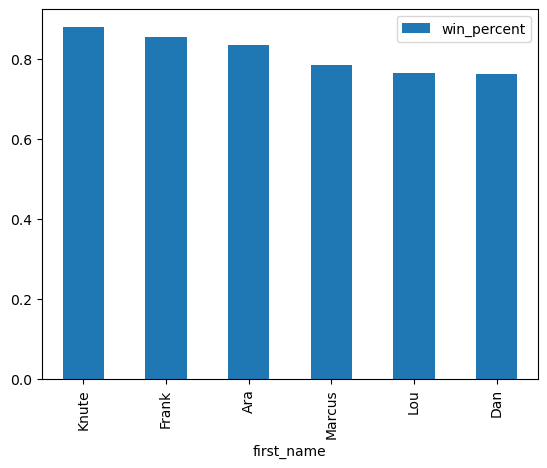

In [72]:
win_df = pd.DataFrame({
    "first_name": ["Knute", "Frank", "Ara", "Dan", "Lou", "Marcus"],
    "last_name": ["Rockne", "Leahy", "Parseghian", "Devine", "Holtz", "Freeman"],
    "win_percent": [0.881, 0.855, 0.836, 0.764, 0.765, 0.786]
}).sort_values(by="win_percent", ascending=False)
# make bar plot
win_df.plot.bar(x="first_name", y="win_percent")
plt.show()

**Exercise 18.** Below, I've computed a correlation matrix with the pairwise correlations between every two pair of columns in `data`. Please use [`seaborn`](https://seaborn.pydata.org/) to plot this correlation matrix as a heatmap (often called a correlation heatmap).

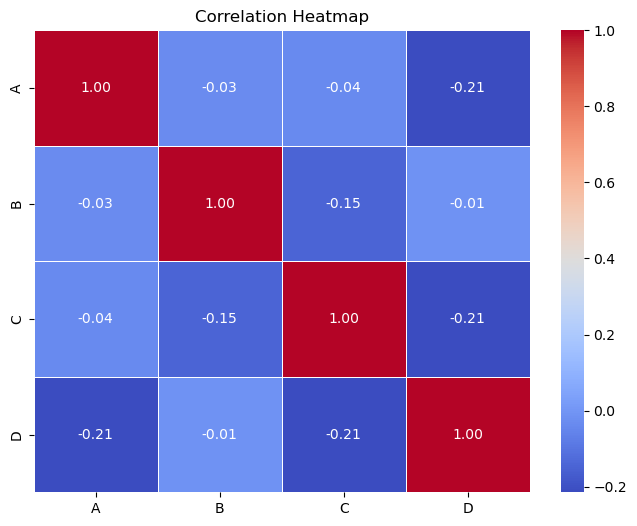

In [73]:
np.random.seed(42)
data = pd.DataFrame({
    'A': np.random.rand(100),
    'B': np.random.rand(100),
    'C': np.random.rand(100),
    'D': np.random.rand(100)
})

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()